# ProbStats Lab1 -- HT week 4

The problems in Laboratory 2 (week 4) for Probability and Statistics focus on the probability of events, specifically how those probabilities can be mathematically represented as distributions. Use this empty notebook to complete portions of the lab that require the Math, NumPy, SciPy, Matplotlib, and other Python libraries. I've loaded a few libraries to get you started.

In [2]:
# Import Math, NumPy, SciPy, and Matplotlib
import math as m
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt 
import pandas as pd

# Q1

Let’s consider how we can use probability distributions to examine the spatial distribution of objects. A
busy squirrel lives in your back garden and has divided the garden into 576 grid cells, each 0.25 m2 in size.
This busy squirrel spends every October Saturday burying acorns, and the squirrel records the distribution of
acorns they bury in the garden (so that they can eat them next spring, of course!), with the following number
of grid cells showing k acorns: 229 cells with 0 acorns; 211 cells with 1 acorns, 93 cells with 2 acorns, 35 cells
with 3 acorns, 7 cells with 4 acorns, and 1 cell with 7 acorns. Does this busy squirrel bury at random, or is
there some clustering pattern to their treasure trove of acorns? 

## Q1a

To gain practice in loading data into Jupyter Notebooks from external files, compose a comma-delimited text file that records the data summarized above as a two-column array. Load this dataset
into your Jupyter Notebook. 


## Q1b

Calculate the total number of acorns with a single line of code. 

## Q1c

Plot a bar plot showing the empirical distribution of acorns, expressed as the number of grid squares
marked by 0, 1, 2 . . . n acorns. Label your axes appropriately. 


## Q1d

Calculate the density parameter μ for the dataset. 

## Q1e

Using your answer from above, calculate the expected distribution of acorns(i.e., the expected number
of cells with 0, 1, 2, . . . n acorns) under the Poisson as a tool to examine the empirical distribution.
As with last week’s binomial exercise, do so with as little code as possible and without resorting to
any NumPy functions for the Poisson distribution. 

## Q1f

Plot these expectations in a bar plot, and compare this to the bar plot you generated for (c). Compare
your two plots, and discuss any differences or similarities. Does the busy squirrel bury these acorns
at random, or did they spatially cluster their acorns? What would you conclude in the light of your
analysis?


In [4]:
#Q1b
total_acorns = pd.read_csv('squirrelnumbers.csv')['Number of Acorns'].sum()
print(total_acorns)

17


In [5]:
!head ../Week12/squirrelnumbers.csv

Number of Acorns,Number of Grid Cells
0,229
1,211
2,93
3,35
4,7
7,1

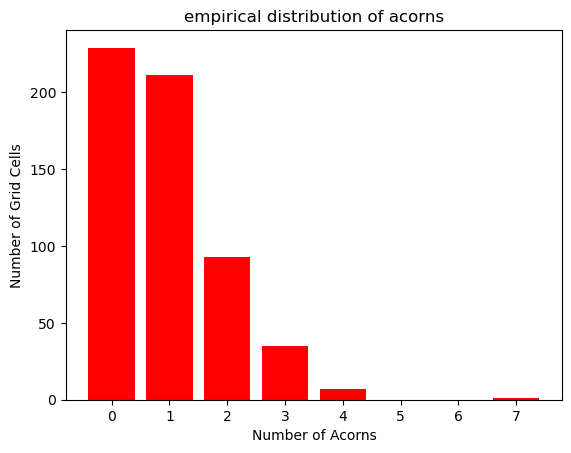

In [9]:
#Q1c
data = np.loadtxt('../Week12/squirrelnumbers.csv', delimiter=',', skiprows=1)
no_of_acorns = data[:, 0]
how_many_cells  = data[:, 1]
fig, ax = plt.subplots()

ax.bar(no_of_acorns, how_many_cells , color='red')
ax.set_xlabel('Number of Acorns')
ax.set_ylabel('Number of Grid Cells')
ax.set_title('empirical distribution of acorns')

plt.show()

In [21]:
#Q1d
no_of_acorns=np.array([0,1,2,3,4,5,6,7])
no_of_cells=np.array([229,211,93,35,7,0,0,1])
sum_of_cells=sum(no_of_cells)
probabilities=[]
for x in no_of_cells:
    probabilities.append((x)/sum_of_cells)
parameter_count=[]
for acorn,prob in zip(no_of_acorns,probabilities):
    parameter_count.append(acorn*prob)

print(sum(parameter_count))
print(parameter_count)
print(probabilities)
print(sum_of_cells)

0.9322916666666667
[0.0, 0.3663194444444444, 0.3229166666666667, 0.18229166666666666, 0.04861111111111111, 0.0, 0.0, 0.012152777777777776]
[0.3975694444444444, 0.3663194444444444, 0.16145833333333334, 0.06076388888888889, 0.012152777777777778, 0.0, 0.0, 0.001736111111111111]
576


### Q1e

$P\left( x \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}}$

$\lambda= np$

$P\left( 0 \right) = 0.39365$

$P\left( 1 \right) = 0.36699$

$P\left(2 \right) = 0.17107$

$P\left( 3 \right) = 0.05316$

$P\left( 4 \right) = 0.01239$

$P\left( 5 \right) = 0.00231$

$P\left( 6 \right) = 0.00035$

$P\left( 7 \right) = 0.00004$


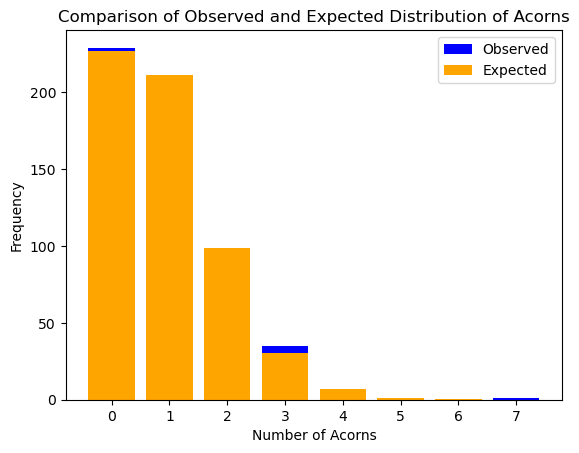

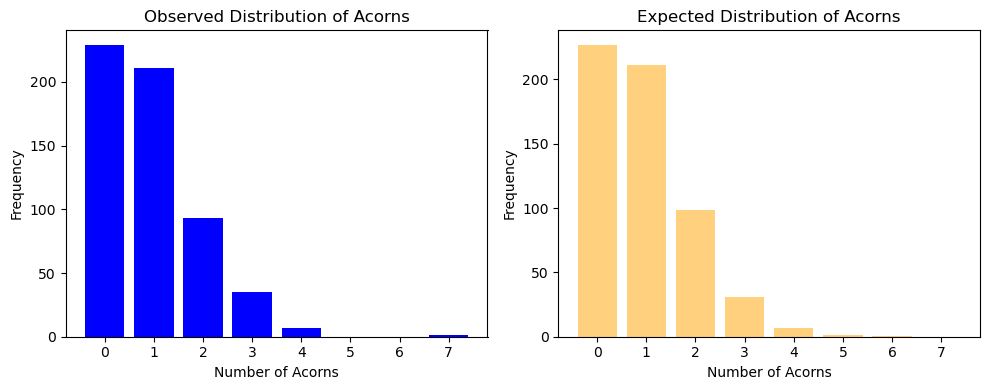

In [12]:
#Q1f


no_acorns = np.array([0, 1, 2, 3, 4, 5, 6, 7])
no_cells = np.array([229, 211, 93, 35, 7, 0, 0, 1])


total_cells = np.sum(no_cells)


estimated_mean = np.sum(no_acorns * no_cells) / total_cells


expected_distribution = []
for x in no_acorns:
    probability = np.exp(-estimated_mean) * (estimated_mean ** x) / m.factorial(x)
    expected_distribution.append(probability * total_cells)


plt.bar(no_acorns, no_cells, color='blue', label='Observed')
plt.bar(no_acorns, expected_distribution, color='orange', label='Expected')
plt.xlabel('Number of Acorns')
plt.ylabel('Frequency')
plt.title('Comparison of Observed and Expected Distribution of Acorns')
plt.legend()
plt.show()


fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot observed distribution
axs[0].bar(no_acorns, no_cells, color='blue')
axs[0].set_xlabel('Number of Acorns')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Observed Distribution of Acorns')

# Plot expected distribution
axs[1].bar(no_acorns, expected_distribution, color='orange', alpha=0.5)
axs[1].set_xlabel('Number of Acorns')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Expected Distribution of Acorns')

# Adjust layout
plt.tight_layout()
plt.show()

#From the charts, the acorns appear to be randomly distributed

# Q2

The longevity of taxa (species, genera, families, and so on) is a function of extinction rates. The observed
stratigraphic ranges of fossil organisms are complicated by incomplete preservation; for the present exercise,
we will assume that rates of fossilization are sufficiently high that stratigraphic ranges can be taken as true
evolutionary durations.
Consider the following dataset, which gives taxonomic ranges (in number of stage-level stratigraphic bins)
for a cohort of ammonite families that make their earliest appearance in the fossil record in the Induan and
Olenekian, the first two stages following the devastating Permo-Triassic event, which is thought to have
resulted in the extinction of roughly 95% of species living in marine environments.
Ammonite ranges (stage-level intervals): 1, 1, 1, 1, 1, 1, 2, 3, 6, 6, 1, 1, 2, 2, 1, 1, 4, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 4.
Note that these data assume positive integer values (i.e., there are no fractional durations). These kinds of
discrete ranges are common in palaeobiological data, since absolute ages are not available for many
stratigraphic subdivisions. 

## Q2a

Which probability distribution do you think might be an appropriate model for examining these
random variables? Why? 

Geometric- number of trials before first event occurs- in this case trials=bins, event=extinction 
or Poisson - good for random, discrete data in fixed units of time
## Q2b

What is the modal taxonomic range? Explain why this is so in light of your response to the previous
question.

Modal taxonomic range is 1. We expect most of the families to be present for a short amount of time.

## Q2c

Calculate mean of these data. From this, and what you learned in lecture, estimate p, the probability
of extinction per stratigraphic interval. 

## Q2d

Find the standard deviation (√variance) of the distribution you suspect might describe these
stratigraphic range data. You were not given the standard deviation of the geometric distribution in
lecture, but you should be able to find this equation in one of the course textbooks or via an online
search. Does the observed standard deviation of the ranges match what you might predict, based on
your responses to parts (a)-(c)? You should calculate standard deviation using a built-in NumPy
function. In light of your discovery, explain whether or not you think your preferred distribution is a
reasonable model for these data. 

## Q2e

It is often claimed that groups appearing during the earliest phases of the Cambrian radiation of
animals were evolutionarily volatile, meaning that they were characterized by high rates of turnover.
Several explanations have been offered as explanations for this putative pattern, ranging from
increasing developmental constraint to the maturation of complex ecosystems. Before entertaining
such hypotheses, it’s worth examining whether or not turnover—which we’ll approximate here using
extinction rate—is really higher for taxa that arose early in the Cambrian. Below are two datasets
comprising stratigraphic ranges of trilobites, ancient arthropods related to modern creatures like crabs,
insects, and spiders. The first dataset is for a cohort of trilobite families appearing in the very earliest
Cambrian, while the second is for those families making their debut in the latest Cambrian. Data from
The Fossil Record 2 (1993).
Earliest Cambrian trilobite cohort (stage-level intervals): 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
1, 1, 1, 1, 2, 1, 1, 3, 2, 3, 2, 2, 9, 3, 2, 1, 3, 3, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 5, 4, 2.
Latest Cambrian trilobite cohort (stage-level intervals): 1, 1, 1, 1, 1, 17, 1, 15, 1, 1, 1, 1, 2, 1, 7, 4, 2,
1, 1, 5, 1, 1, 1, 1, 1, 7, 5, 1, 1, 1, 7, 3, 6, 3, 1, 1, 1, 1, 1.
What is your estimate of extinction rate for each of these two examples? Are your answers consistent
or at odds with the prevailing hypothesis about declining rates of extinction? 

In [18]:
#Q2c

taxonomic_ranges = [1, 1, 1, 1, 1, 1, 2, 3, 6, 6, 1, 1, 2, 2, 1, 1, 4, 3, 2, 1, 1, 1, 1, 1, 1, 2, 1, 4]

mean_taxonomic_range = np.mean(taxonomic_ranges)
print("Mean:", mean_taxonomic_range)

#Mean=1/p
#p=1/mean

P=1/(mean_taxonomic_range)
print(P)

Mean: 1.8928571428571428
0.5283018867924528


In [25]:
#Q2d
#variance=(1-p)/p2
standard_deviation = np.sqrt((1 - P) / P**2)
print('Expected standard deviation:', standard_deviation)

observed_std_dev = np.std(taxonomic_ranges)
print("Observed standard deviation-geo:", observed_std_dev)

#observed and expected are 0.1 apart, which is quite close, so geometric distribution could be a good fit

Expected standard deviation: 1.3000196230858068
Observed standard deviation-geo: 1.4476405856793746


In [24]:
#Comparing with Poission,
#Mean=variance
stdev_test=np.sqrt(mean_taxonomic_range)
print("Observed standard deviation-Poisson:",stdev_test)

#observed and expected are 0.07 apart, which is even closer, so Poisson distribution could be a better fit

Observed standard deviation-Poisson: 1.3758114488755873


In [27]:
#Q2e

earliest_cambrian_trilobites = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 3, 2, 2, 9, 3, 2, 1, 3, 3, 1, 1, 1, 2, 2, 2, 2, 3, 2, 2, 5, 4, 2]

mean_earliest_cambrian = np.mean(earliest_cambrian_trilobites)
print("Extinction rate for earliest Cambrian trilobites:", mean_earliest_cambrian)



latest_cambrian_trilobites = [1, 1, 1, 1, 1, 17, 1, 15, 1, 1, 1, 1, 2, 1, 7, 4, 2, 1, 1, 5, 1, 1, 1, 1, 1, 7, 5, 1, 1, 1, 7, 3, 6, 3, 1, 1, 1, 1, 1]

mean_latest_cambrian = np.mean(latest_cambrian_trilobites)
print("Extinction rate for latest Cambrian trilobites:", mean_latest_cambrian)

#Extinction in earlier tribolites happened quicker, in line with the prevailing hypothesis

Extinction rate for earliest Cambrian trilobites: 1.816326530612245
Extinction rate for latest Cambrian trilobites: 2.7948717948717947


# Q3

 Geologists often examine the mineral composition of sand to determine probable provenance. The more
distinctive composition a sand has, the easier it is for geologists to pinpoint the source rock from which that
sand may have eroded from. A hypothesized source rock has fragmented bivalve shells making up 4.9% of all
grains (by count, rather than by volume). You’ve got a modest sample of 63 sand grains from a beach, and
you find that 6 of the grains are fragments of bivalve shell. 

## Q3a

If the sand is indeed from the hypothesized source rock, what is the chance of observing this exact
outcome?

## Q3b

What is the probability that a sample of 63 grains from the beach will contain 6 or more fragments of
bivalve shell? In doing so, you should perform your calculations on the shortest array possible, and
not resort to any NumPy functions for the binomial distribution.

## Q3c

Now calculate the same quantity using a single line of code and the function scipy.stats.binom.pmf().
Describe, in words, what this function does. Make sure your numerical answer agrees with your
previous response. 

## Q3d

Now calculate the same quantity using a single line of code and the function scipy.stats.binom.cdf().
Describe, in words, what this function does. How is this different from scipy.stats.binom.pmf()?
Make sure all of your probabilities agree. 

## Q3e

In light of your calculations, what do you think of the provenance of your sand sample? Does it likely
derive from the hypothesized source rock? 

### Q3a

Binomial formula =$ \sum_{k=0}^n \binom{n}{k} p^k (1-p)^{n-k}$

where $n=63$, $p=0.049$ and $k=6$

Probability = 0.0536


### Q3b
$P\left( x>=6 \right) = 1- P\left( x<6\right) = 1-0.91221=0.08779$

In [34]:
#Q3c
probability = 1 - sc.stats.binom.pmf(5, 63, 0.049)-sc.stats.binom.pmf(4, 63, 0.049)-sc.stats.binom.pmf(3, 63, 0.049)-sc.stats.binom.pmf(2, 63, 0.049)-sc.stats.binom.pmf(1, 63, 0.049)-sc.stats.binom.pmf(0, 63, 0.049)
print(probability)

0.08778260210429042


In [32]:
#Q3d
probability1 = 1 - sc.stats.binom.cdf(5, 63, 0.049)
print(probability1)

0.08778260210429079


PMF= probability of getting exactly k successes in n trials, CDF = probability of getting at most k successes in n trials.

### Q3e

There is less than 1% probability to get 6 fragments out of 63 grains